In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from IPython.display import Video

## 1. Non-conservative form

In [3]:
import Euler.Periodic_1D as elr

Rotating 1D shallow water inviscid dynamical equations over a flat bottom are:

$$ \frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} - fv = -g\frac{\partial h}{\partial x},$$

$$ \frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + fu = 0, $$

$$ \frac{\partial h}{\partial t} + \frac{\partial (uh)}{\partial x} = 0.$$

## Using normal grid

In [4]:
#Defining necessary constants

g = 9.81
rho0 = 1025
r0 = 6.378*10**6
day = 24*60*60 # length of day [seconds]
omega = 2*np.pi / day

In [4]:
#Length of domain
Lx = 6

#Number of points in the domain
nx = 200

#Width of each cell
dx = Lx/nx

g = 9.81
rho0 = 1025

#An array of all points
x = np.linspace(-Lx/2,Lx/2,nx+1,dtype = float)
#x = x[0:-1]

In [29]:
#MLD_0 = -150*np.exp(0.05*x/Lx)

um_old = np.zeros(nx+1)
um_new = np.zeros(nx+1)
vm_old = np.zeros(nx+1)
vm_new = np.zeros(nx+1)
#hm_old = 0.1*np. exp(-(x-Lx/2)**2/(2**2))+10
#hm_old_t0 = 0.1*np. exp(-(x-Lx/2)**2/(2**2))+10

hm_old = 1 + 0.4*np.exp(-5*x**2)
hm_old_t0 = 1 + 0.4*np.exp(-5*x**2)
hm_new = np.zeros(nx)

t_start = 0
t_end = 0.7
dt = 0.0001

for t in np.arange(t_start,t_end,dt):
    
    um_new = um_old - dt*elr.adv_x(um_old,um_old,dx,nx) - dt*g*elr.partial_x_cd(hm_old,dx,nx) #+ dt*f*vm_old 
    
    #vm_new = vm_old - dt*elr.adv_x(um_old,vm_old,dx,nx) - dt*f*um_old
    
    hm_new = hm_old - dt*um_old*elr.partial_x_cd(hm_old,dx,nx) - dt*hm_old*elr.partial_x_cd(um_old,dx,nx)
    
    um_new[0] = 0
    um_new[-1] = 0
    hm_new[0] = 1
    hm_new[-1] = 1
    
    um_old = um_new
    #vm_old = vm_new
    hm_old = hm_new

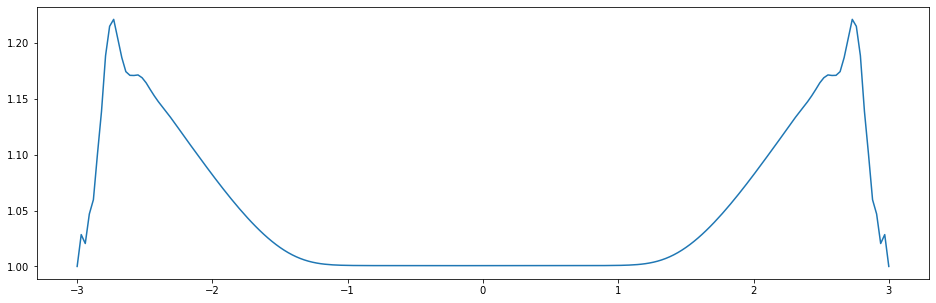

In [30]:
plt.figure(figsize = (16,5))
plt.plot(x, hm_old)

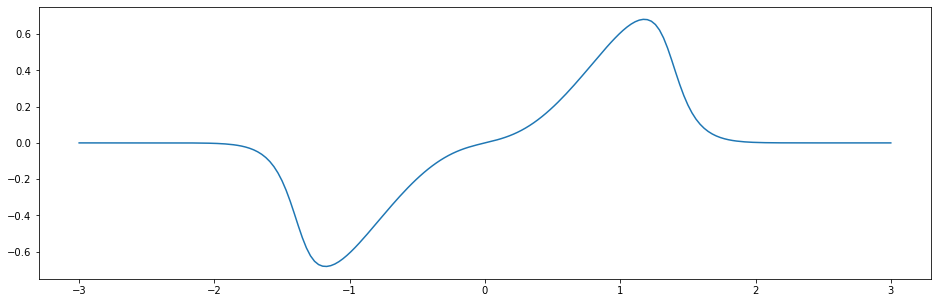

In [7]:
plt.figure(figsize = (16,5))
plt.plot(x, hm_old*um_old)

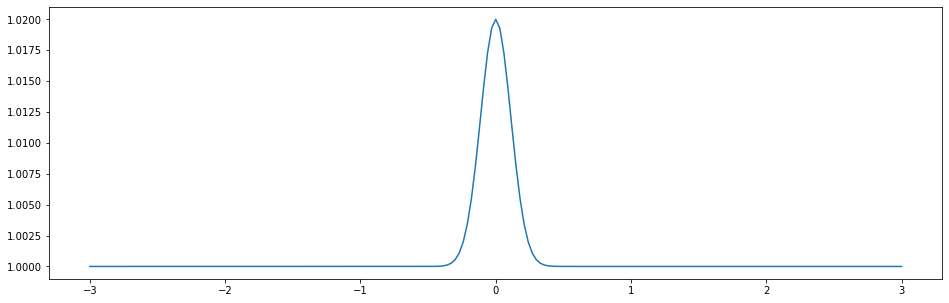

In [11]:
plt.figure(figsize = (16,5))
plt.plot(x, hm_old_t0)

## Using staggered grid

In [16]:
#Length of domain
Lx = 6

#Number of points in the domain
nx = 256

#Width of each cell
dx = Lx/nx

g = 9
rho0 = 1025

#An array of all points
xu_ocean = np.linspace(-Lx/2,Lx/2,nx+1,dtype = float)
xt_ocean = xu_ocean + dx/2
xt_ocean = xt_ocean[0:-1]

In [17]:
%%time
#MLD_0 = -150*np.exp(0.05*x/Lx)

um_old = np.zeros(nx+1)
um_new = np.zeros(nx+1)
#hm_old = 0.1*np. exp(-(x-Lx/2)**2/(2**2))+10
#hm_old_t0 = 0.1*np. exp(-(x-Lx/2)**2/(2**2))+10

hm_old = 1 + 0.0002*np.exp(-20*(xt_ocean-1)**2)
hm_old_t0 = 1 + 0.0002*np.exp(-20*(xt_ocean-1)**2)
hm_new = np.zeros(nx)

t_start = 0
t_end = 5/3
dt = 0.001

for t in np.arange(t_start,t_end,dt):
    um_new[1:nx] = um_old[1:nx] - dt*elr.adv_x(um_old,um_old,dx,nx)[1:nx] - dt*g*(1/dx)*(
        hm_old[1:nx] - hm_old[0:nx-1])
    
    hm_new[1:nx-1] = hm_old[1:nx-1] - dt*(um_old[1:nx-1] + um_old[2:nx])*0.5*elr.partial_x_cd(
        hm_old,dx,nx)[1:nx-1] - dt*(1/dx)*(hm_old[1:nx-1]*(um_old[2:nx] - um_old[1:nx-1]))
    
    #Reflecting boundary conditions
    #um_new[0] = 0
    #um_new[-1] = 0
    #hm_new[0] = 1
    #hm_new[-1] = 1
    
    hm_new[0] = hm_new[1]
    hm_new[-1] = hm_new[-2]
    um_new[0] = um_new[1]
    um_new[-1] = um_new[-2]
    
    #um_new[-1] = um_new[1]
    #um_new[0] = um_new[-2]
    #hm_new[-1] = hm_new[1]
    #hm_new[0] = hm_new[-2]
    
    um_old = um_new
    hm_old = hm_new

CPU times: user 673 ms, sys: 18.5 ms, total: 692 ms
Wall time: 677 ms


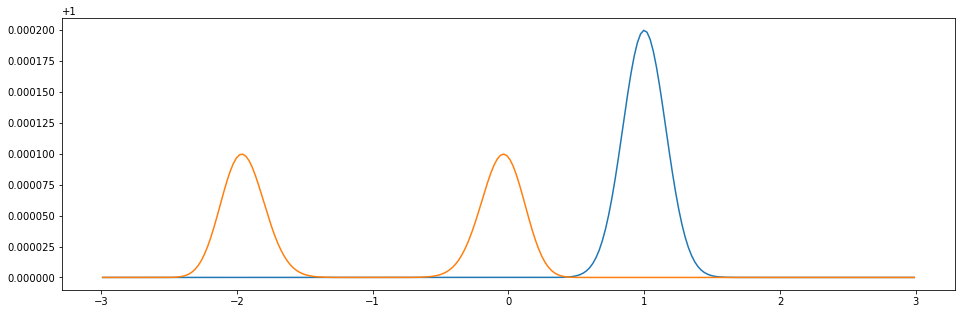

In [18]:
plt.figure(figsize = (16,5))
plt.plot(xt_ocean, hm_old_t0)
plt.plot(xt_ocean, hm_old)

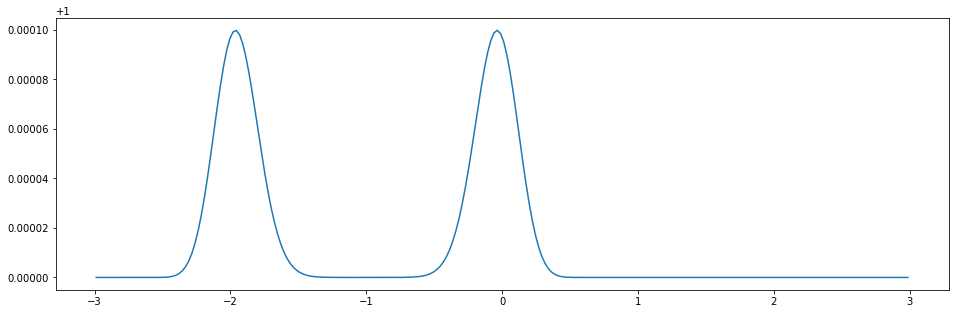

In [19]:
plt.figure(figsize = (16,5))
plt.plot(xt_ocean, hm_old)

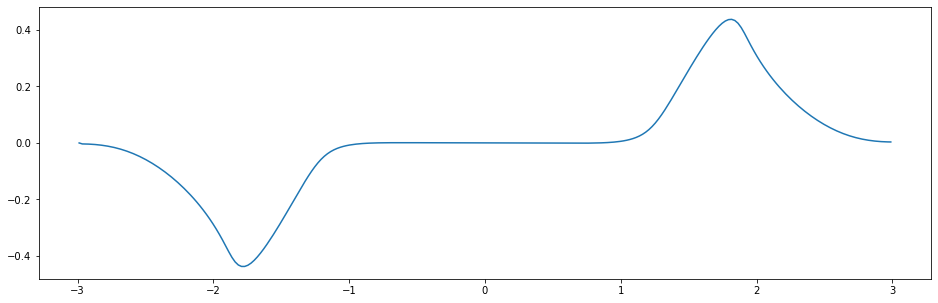

In [31]:
plt.figure(figsize = (16,5))
plt.plot(xt_ocean, hm_old*um_old[0:-1])

## Making animations

In [36]:
#Length of domain
Lx = 6

#Number of points in the domain
nx = 256

#Width of each cell
dx = Lx/nx

g = 9
rho0 = 1025

#An array of all points
xu_ocean = np.linspace(-Lx/2,Lx/2,nx+1,dtype = float)
xt_ocean = xu_ocean + dx/2
xt_ocean = xt_ocean[0:-1]

In [37]:
from matplotlib import animation

um_old = np.zeros(nx+1)
um_new = np.zeros(nx+1)
#hm_old = 0.1*np. exp(-(x-Lx/2)**2/(2**2))+10
#hm_old_t0 = 0.1*np. exp(-(x-Lx/2)**2/(2**2))+10

hm_old = 1 + 0.0002*np.exp(-20*(xt_ocean)**2)
hm_old_t0 = 1 + 0.0002*np.exp(-20*(xt_ocean)**2)
hm_new = np.zeros(nx)

t_start = 0
t_end = 5/3
dt = 0.001

um_data = np.zeros((nx+1,int(t_end/dt) + 1))
vm_data = np.zeros((nx+1,int(t_end/dt) + 1))
hm_data = np.zeros((nx,int(t_end/dt) + 1))

for t in np.arange(t_start,t_end,dt):
    um_new[1:nx] = um_old[1:nx] - dt*elr.adv_x(um_old,um_old,dx,nx)[1:nx] - dt*g*(1/dx)*(
        hm_old[1:nx] - hm_old[0:nx-1])
    
    hm_new[1:nx-1] = hm_old[1:nx-1] - dt*(um_old[1:nx-1] + um_old[2:nx])*0.5*elr.partial_x_cd(
        hm_old,dx,nx)[1:nx-1] - dt*(1/dx)*(hm_old[1:nx-1]*(um_old[2:nx] - um_old[1:nx-1]))
    
    #Reflecting boundary conditions
    #um_new[0] = 0
    #um_new[-1] = 0
    #hm_new[0] = 1
    #hm_new[-1] = 1
    
    hm_new[0] = hm_new[1]
    hm_new[-1] = hm_new[-2]
    um_new[0] = um_new[1]
    um_new[-1] = um_new[-2]
    
    #um_new[-1] = um_new[1]
    #um_new[0] = um_new[-2]
    #hm_new[-1] = hm_new[1]
    #hm_new[0] = hm_new[-2]
    
    um_old = um_new
    hm_old = hm_new
    
    um_data[:,int(t/dt)] = um_old
    #vm_data[:,int(t/dt)] = vm_old
    hm_data[:,int(t/dt)] = hm_old

In [38]:
fig,ax = plt.subplots(figsize = (16,5)) 

def update_fig(i):
    
    plt.clf()
    plt.title('Time = ' + str(dt*i*5))
    p1 = plt.plot(xt_ocean, hm_data[:,i*5]) 
    return p1

num_frames = 260
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = True)
anim.save('Wave_height.mp4',writer = 'ffmpeg',fps = 16)

plt.close(anim._fig)

#Video("Wave_height.mp4")

<img src= "Wave_height.mp4" width= "1200" height = "200" align= "center">

In [39]:
from IPython.display import HTML

HTML("""
    <video alt="Wave_height" controls>
        <source src="Wave_height.mp4" type="video/mp4">
    </video>
""")

In [25]:
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

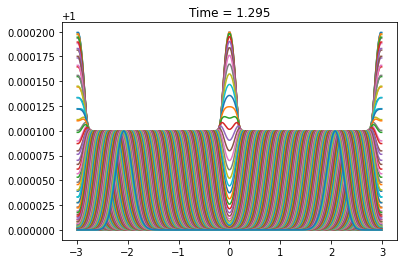

In [26]:
anim

## Test 4 : 1D SWE in the presence of coriolis forcing

In [4]:
#Length of domain
Lx = 6

#Number of points in the domain
nx = 256

#Width of each cell
dx = Lx/nx

g = 9
rho0 = 1025

#An array of all points
xu_ocean = np.linspace(-Lx/2,Lx/2,nx+1,dtype = float)
xt_ocean = xu_ocean + dx/2
xt_ocean = xt_ocean[0:-1]

In [22]:
#MLD_0 = -150*np.exp(0.05*x/Lx)

um_old = np.zeros(nx+1)
um_new = np.zeros(nx+1)
vm_old = np.zeros(nx+1)
vm_new = np.zeros(nx+1)
#hm_old = 0.1*np. exp(-(x-Lx/2)**2/(2**2))+10
#hm_old_t0 = 0.1*np. exp(-(x-Lx/2)**2/(2**2))+10
f = 2*omega*np.sin(np.deg2rad(30))*np.ones(xt_ocean.shape)

hm_old = 1 + 0.0002*np.exp(-20*(xt_ocean)**2)
hm_old_t0 = 1 + 0.0002*np.exp(-20*(xt_ocean)**2)
hm_new = np.zeros(nx)

t_start = 0
t_end = 5/3
dt = 0.0001

for t in np.arange(t_start,t_end,dt):
    um_new[1:nx] = um_old[1:nx] - dt*elr.adv_x(um_old,um_old,dx,nx)[1:nx] - dt*g*(1/dx)*(
        hm_old[1:nx] - hm_old[0:nx-1]) + dt*(f[0:nx-1] + f[1:nx])*0.5*vm_old[1:nx]
    
    vm_new[1:nx] = vm_old[1:nx] - dt*elr.adv_x(um_old,vm_old,dx,nx)[1:nx] - dt*(
        f[0:nx-1] + f[1:nx])*0.5*um_old[1:nx]
    
    hm_new[1:nx-1] = hm_old[1:nx-1] - dt*(um_old[1:nx-1] + um_old[2:nx])*0.5*elr.partial_x_cd(
        hm_old,dx,nx)[1:nx-1] - dt*(1/dx)*(hm_old[1:nx-1]*(um_old[2:nx] - um_old[1:nx-1]))
    
    #Reflecting boundary conditions
    #um_new[0] = 0
    #um_new[-1] = 0
    #hm_new[0] = 1
    #hm_new[-1] = 1
    
    hm_new[0] = hm_new[1]
    hm_new[-1] = hm_new[-2]
    um_new[0] = um_new[1]
    um_new[-1] = um_new[-2]
    vm_new[-1] = vm_new[-2]
    vm_new[0] = vm_new[1]
    
    #um_new[-1] = um_new[1]
    #um_new[0] = um_new[-2]
    #hm_new[-1] = hm_new[1]
    #hm_new[0] = hm_new[-2]
    
    um_old = um_new
    vm_old = vm_new
    hm_old = hm_new

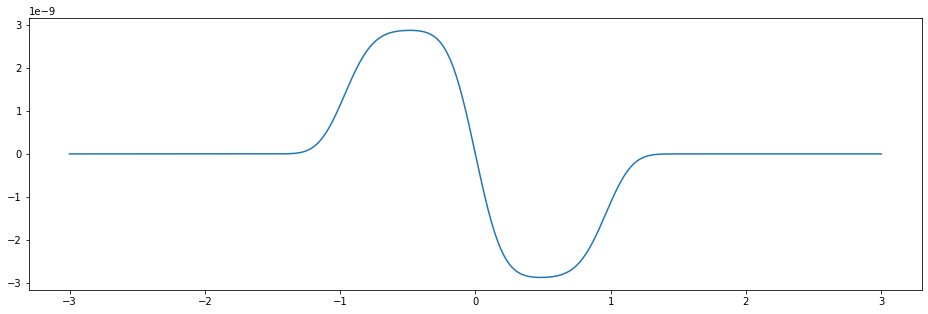

In [25]:
plt.figure(figsize = (16,5))
plt.plot(xu_ocean, vm_old)